In [7]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import string
import math

#Importamos el DF que exportamos previamente a csv en "Cleaning_DS_v2":
DF_Jobs_and_Candidates = pd.read_csv('DF_Exportado_Jobs_And_Candidates.csv')
DF_Jobs_and_Candidates.tail()

,Candidate_Name,Content_CV,clean_Content_CV,tokens_Content_CV,Job_Title,Job_Description,clean_Job_Description,tokens_Job_Description,Keywords,Cosine_Job_Desc,WMD_Job_Desc
95,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Machine Learning Engineer 2,collaborate with a multidisciplinary team to g...,collaborate multidisciplinary team gain insigh...,"['collaborate', 'multidisciplinary', 'team', '...","2+, knowledge, of, with, experience, collabora...",0.158,0.496
96,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Security Specialist,work in a fast-paced environment that combine ...,work fast-paced environment combine technical ...,"['work', 'fast-paced', 'environment', 'combine...","experience, with, work, fast-paced, combine, o...",0.154,0.501
97,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Security Specialist 2,\n handling incoming requests for assistanc...,handling incoming requests assistance business...,"['handling', 'incoming', 'request', 'assistanc...","security, of, handling, incoming, requests, fo...",0.115,0.486
98,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Web Developer Full Stack,\n\n graduate degree in information technol...,graduate degree information technology similar...,"['graduate', 'degree', 'information', 'technol...","experience, written, typescript), skills, and,...",0.188,0.490
99,Web_Dev_Karen_Higgins,\nKaren Higgins \n We b Developer \n \n...,karen higgins b developer areas expertise pers...,"['karen', 'higgins', 'b', 'developer', 'area',...",Web Developer Full Stack 2,\n· enter existing website codebases and exten...,enter existing website codebases extend functi...,"['enter', 'existing', 'website', 'codebases', ...","5, (required), enter, existing, website, codeb...",0.204,0.507


In [8]:
#Nos quedamos con las columnas necesarias:
DF_J_and_C = DF_Jobs_and_Candidates.loc[:, ['Candidate_Name', 'Job_Title', 'Cosine_Job_Desc', 'WMD_Job_Desc']]
DF_J_and_C

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
1,Data_Scientist_Karla_Lewis,Data Scientist 2,0.210,0.494
2,Data_Scientist_Karla_Lewis,HCM Consultant,0.085,0.480
3,Data_Scientist_Karla_Lewis,HCM Consultant 2,0.058,0.475
4,Data_Scientist_Karla_Lewis,Machine Learning Engineer,0.118,0.485
...,...,...,...,...
95,Web_Dev_Karen_Higgins,Machine Learning Engineer 2,0.158,0.496
96,Web_Dev_Karen_Higgins,Security Specialist,0.154,0.501
97,Web_Dev_Karen_Higgins,Security Specialist 2,0.115,0.486
98,Web_Dev_Karen_Higgins,Web Developer Full Stack,0.188,0.490


### KNN aplicado solo para Data Scientist:

##### 1-Armado DF con Job Description =  Data Scientist para 9 candidatos a excepción de Web_Dev_Karen_Higgins.

##### 2-Aplicando KNN.

##### 3-¿Qué pasa al añadir un nuevo Candidato (Web_Dev_Karen_Higgins)? ¿Qué se tiene que volver a calcular?

##### 4-¿Qué pasa al añadir un nuevo Job Description (Data Scientist 2)? ¿Qué se tiene que volver a calcular?

##### 1-Armado DF con Job Description =  Data Scientist para 9 candidatos a excepción de Web_Dev_Karen_Higgins.

In [9]:
#Filtramos solo a la Candidata Karla Lewis:
new_df =  DF_J_and_C[(DF_J_and_C['Job_Title']=='Data Scientist') & (DF_J_and_C['Candidate_Name']!='Web_Dev_Karen_Higgins')]
new_df

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491
20,HCM_Federico_Calonge,Data Scientist,0.161,0.491
30,HCM_Robert_Smith,Data Scientist,0.136,0.486
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546
50,ML_Engineer_Jonathon_Price,Data Scientist,0.371,0.540
60,Security_Specialist_Ahmed Wayne,Data Scientist,0.126,0.482
70,Security_Specialist_Denis Banik,Data Scientist,0.088,0.491
80,Web_Dev_Alec_Dionisio,Data Scientist,0.090,0.485


##### Ahora crearemos 3 columnas: 
- Columna 'Match Cosine'.
- Columna 'Match WMD'.
- Columna 'Final Match'

Según el siguiente criterio:

   * Las primeras 2 ('Match Cosine' y Match WMD') serán columnas numéricas donde insertamos:
        * '1' en caso que el CV tenga una coincidencia BAJA con el Job.
            * En el caso de 'Match Cosine': se deberá cumplir que   'Cosine_Job_Desc' <0.15
            * En el caso de 'Match WMD': se deberá cumplir que      'WMD_Job_Desc'    <0.49

        * '2' en caso que el CV tenga una coincidencia MEDIA con el Job.   
            * En el caso de 'Match Cosine': se deberá cumplir que  0.15 =< 'Cosine_Job_Desc' <0.30 
            * En el caso de 'Match WMD': se deberá cumplir que     0.49 =< 'WMD_Job_Desc'    <0.50

        * '3' en caso que el CV tenga una coincidencia ALTA con el Job. 
            * En el caso de 'Match Cosine': se deberá cumplir que  0.30 =< 'Cosine_Job_Desc'
            * En el caso de 'Match WMD': se deberá cumplir que     0.50 =< 'WMD_Job_Desc'
   
   
   * 'Final Match' será una columna "promedio" entre las 2 columnas anteriores, con preponderación en Cosine sobre WDM (por los resultados obtenidos en el Jupyter '4-Analysis of Results (Comparitions between Candidates and Jobs + Rankings)'. Esta nueva columna tendrá como valor:
        * '1' en caso que se de alguna de las condiciones...:
            * Match Cosine = 1  &  Match WMD = 1.
            * Match Cosine = 1  &  Match WMD = 2.
        * '2' en caso que se de alguna de las condiciones...:
            * Match Cosine = 2  &  Match WMD = 2.
            * Match Cosine = 2  &  Match WMD = 1. (esta condición está dentro del '2' ya que preponderamos el Cosine sobre el WMD).
            * Match Cosine = 2  &  Match WMD = 3.  
        * '3'en caso que se de alguna de las condiciones...:
            * Match Cosine = 3  &  Match WMD = 3.
            * Match Cosine = 3  &  Match WMD = 2. (esta condición está dentro del '3' ya que preponderamos el Cosine sobre el WMD).

In [10]:
####################################################################################################
#Columna 'Match Cosine':

# Lista de condiciones:
conditions_COS = [
    (new_df['Cosine_Job_Desc']<0.15),
    (new_df['Cosine_Job_Desc']>=0.15) & (new_df['Cosine_Job_Desc']<0.30),
    (new_df['Cosine_Job_Desc']>=0.30)
    ]

# Lista de valores para asignar a cada condicion:
values_COS = [1, 2, 3]

# Creamos una nueva columna y usamos np.select para asignar los valores a esta usando las listas anteriores 
#como argumentos:
new_df['Match Cosine'] = np.select(conditions_COS, values_COS)

####################################################################################################
#Columna 'Match WMD':

# Lista de condiciones:
conditions_WMD = [
    (new_df['WMD_Job_Desc']<0.49),
    (new_df['WMD_Job_Desc']>=0.49) & (new_df['WMD_Job_Desc']<0.50),
    (new_df['WMD_Job_Desc']>=0.50)
    ]

# Lista de valores para asignar a cada condicion:
values_WMD = [1, 2, 3]

# Creamos una nueva columna y usamos np.select para asignar los valores a esta usando las listas anteriores 
#como argumentos:
new_df['Match WMD'] = np.select(conditions_WMD, values_WMD)

####################################################################################################
#Columna 'Final Match':

# Lista de condiciones:
conditions_Match = [
    (new_df['Match Cosine']==1) & (new_df['Match WMD']==1),
    (new_df['Match Cosine']==1) & (new_df['Match WMD']==2),
    (new_df['Match Cosine']==2) & (new_df['Match WMD']==2), 
    (new_df['Match Cosine']==2) & (new_df['Match WMD']==1), 
    (new_df['Match Cosine']==2) & (new_df['Match WMD']==3),
    (new_df['Match Cosine']==3) & (new_df['Match WMD']==3), 
    (new_df['Match Cosine']==3) & (new_df['Match WMD']==2)
    ]

# Lista de valores para asignar a cada condicion:
values_Match = [1,1,2,2,2,3,3]

# Creamos una nueva columna y usamos np.select para asignar los valores a esta usando las listas anteriores 
#como argumentos:
new_df['Final Match'] = np.select(conditions_Match, values_Match)

<ipython-input-10-dcc9919fcbd6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Match Cosine'] = np.select(conditions_COS, values_COS)
<ipython-input-10-dcc9919fcbd6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Match WMD'] = np.select(conditions_WMD, values_WMD)
<ipython-input-10-dcc9919fcbd6>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [11]:
#Por último mostramos el DF:
new_df

,Candidate_Name,Job_Title,Cosine_Job_Desc,WMD_Job_Desc,Match Cosine,Match WMD,Final Match
0,Data_Scientist_Karla_Lewis,Data Scientist,0.139,0.489,1,1,1
10,Data_Scientist_Rahul_Malik,Data Scientist,0.160,0.491,2,2,2
20,HCM_Federico_Calonge,Data Scientist,0.161,0.491,2,2,2
30,HCM_Robert_Smith,Data Scientist,0.136,0.486,1,1,1
40,ML_Engineer_Bradly_Johnston,Data Scientist,0.408,0.546,3,3,3
50,ML_Engineer_Jonathon_Price,Data Scientist,0.371,0.540,3,3,3
60,Security_Specialist_Ahmed Wayne,Data Scientist,0.126,0.482,1,1,1
70,Security_Specialist_Denis Banik,Data Scientist,0.088,0.491,1,2,1
80,Web_Dev_Alec_Dionisio,Data Scientist,0.090,0.485,1,1,1


/home/fedricio/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


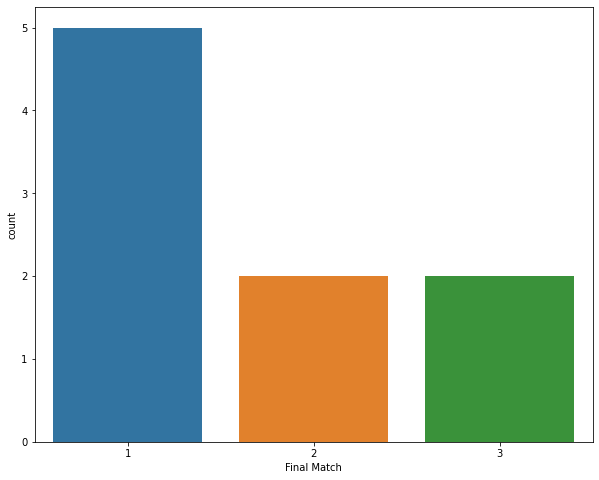

In [20]:
#Vemos la cantidad de "Final Match" para los Candidatos:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.countplot(new_df['Final Match'])
plt.show()

In [12]:
##### 2-Aplicando KNN.

In [23]:
#En X colocamos únicamente las features numéricas 'Cosine_Job_Desc' y 'WMD_Job_Desc' para predecir la variable Y.
x_data = new_df.drop(["Candidate_Name","Job_Title","Match Cosine","Match WMD","Final Match"],axis=1)

#En Y colocaremos nuestra variable a predecir / nuestro "target", 'Final Match':
y = new_df['Final Match']

In [24]:
x_data

,Cosine_Job_Desc,WMD_Job_Desc
0,0.139,0.489
10,0.160,0.491
20,0.161,0.491
30,0.136,0.486
40,0.408,0.546
50,0.371,0.540
60,0.126,0.482
70,0.088,0.491
80,0.090,0.485


In [25]:
y

0     1
10    2
20    2
30    1
40    3
50    3
60    1
70    1
80    1
Name: Final Match, dtype: int64

In [27]:
#KNN librerias:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [31]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,8) #Valores de K (1-25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0, 0.5, 'Testing Accuracy')

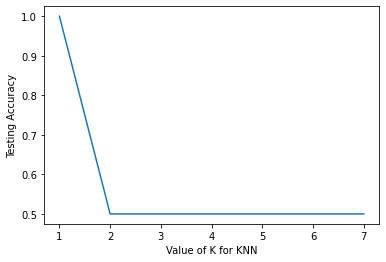

In [32]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
#Elegimos un K=2 ya que vemos que allí la eficiencia es del 0,95% (Alta) y nuestro algoritmo predecirá bien.

### Entrenamos al algoritmo de KNN con un K óptimo (K=2)

In [33]:
k_Optimo=1
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 1.0


##### 3-¿Qué pasa al añadir un nuevo Candidato (Web_Dev_Karen_Higgins)? ¿Qué se tiene que volver a calcular?

##### 4-¿Qué pasa al añadir un nuevo Job Description (Data Scientist 2)? ¿Qué se tiene que volver a calcular?